# Q3

### Rosenberg function

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


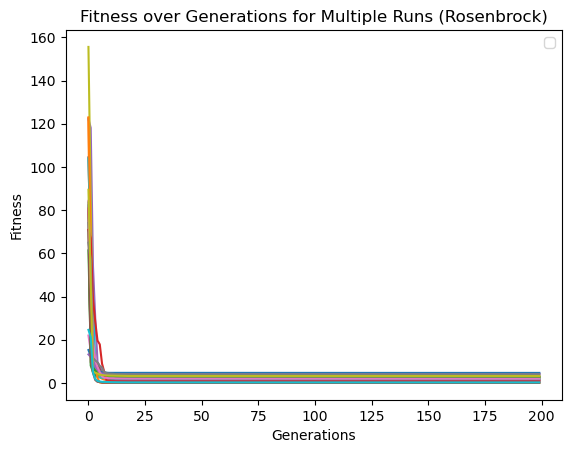

Run 1 - Best solution: [0.7679804684519724, 0.6014154268711378, 0.36797436484321366, 0.1386583657587548, -3.1250476844491004e-05], Fitness: 1.4096534843339061
Run 2 - Best solution: [0.799980956740673, 0.6399785152971695, 0.41597509727626436, 0.18128401617456325, 0.03284425116350009], Fitness: 1.1919075703628814
Run 3 - Best solution: [0.5106640421149002, 0.2559726558327613, 0.06396972610055673, 0.014031464103151148, 0.00021875333791099294], Fitness: 2.653741950248971
Run 4 - Best solution: [1.012046692607004, 1.0240468757152668, 0.8959824216067749, 0.7679804684519724, 0.5759775387197679], Fitness: 2.537012133813627
Run 5 - Best solution: [0.8475441824979022, 0.7172921950103, 0.5119765621423666, 0.2695353627832455, 0.07265735866330969], Fitness: 0.8811595139354623
Run 6 - Best solution: [0.8767321278706035, 0.768042969405661, 0.5547272144655526, 0.2719728999771114, -3.1250476844491004e-05], Fitness: 1.5963798550468664
Run 7 - Best solution: [-0.8359815060654612, 0.7110420996414133, 0.5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(variables):
    a = 1
    b = 100
    return sum(b * (variables[i + 1] - variables[i]**2)**2 + (a - variables[i])**2 for i in range(len(variables) - 1))

# change binary to decimal with min and max 
def binary_to_decimal(binary, min_val, max_val):
    decimal = int(binary, 2)
    return min_val + (decimal / (2**len(binary) - 1)) * (max_val - min_val)

# initialize population
def initialize_population(population_size, chromosome_length):
    return [''.join(np.random.choice(['0', '1']) for _ in range(chromosome_length)) for _ in range(population_size)]

# هر یک از کروموزوم های موجود در جمعیت را گرفته و فیتنس مربوط به آن را محاسبه میکند 
def evaluate_population(population, fitness_func, variables_ranges):
    fitness_values = []
    num_variables = len(variables_ranges)
    bits_per_variable = len(population[0]) // num_variables

    for chromosome in population:
        variables = [binary_to_decimal(chromosome[i * bits_per_variable:(i + 1) * bits_per_variable], 
                                       variables_ranges[i][0], variables_ranges[i][1]) 
                     for i in range(num_variables)]
        fitness_values.append(fitness_func(variables))
    return fitness_values 


def select_parents(population, fitness_values):
    probabilities = [1 / f for f in fitness_values]
    total = sum(probabilities)
    probabilities = [p / total for p in probabilities]
    parents = np.random.choice(population, size=len(population), p=probabilities)
    return parents


def crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1) - 1)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]


def mutate(chromosome, mutation_rate):
    return ''.join(bit if np.random.rand() > mutation_rate else '1' if bit == '0' else '0' for bit in chromosome)

# Exponential Ranking for survivor selection
def exponential_ranking_selection(population, fitness_values, base=1.05):
    ranked_population = [x for _, x in sorted(zip(fitness_values, population))]
    ranks = np.arange(1, len(ranked_population) + 1)
    probabilities = base ** (-ranks)
    probabilities /= probabilities.sum()
    selected = np.random.choice(ranked_population, size=len(population), p=probabilities)
    return selected


def genetic_algorithm(fitness_func, variables_ranges, population_size=100, generations=500, mutation_rate=0.01):
    num_variables = len(variables_ranges)
    bits_per_variable = 16  # تعداد بیت‌ها برای هر متغیر
    chromosome_length = num_variables * bits_per_variable
    population = initialize_population(population_size, chromosome_length)
    fitness_over_generations = []

    for generation in range(generations):
        fitness_values = evaluate_population(population, fitness_func, variables_ranges)
        fitness_over_generations.append(min(fitness_values))
        
#         اگر بهترین عضو پیدا شد الگوریتم را متوقف کن 
        if min(fitness_values) == 0:
            break
        
#         parent selection 
        parents = select_parents(population, fitness_values)
        new_population = []
        
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i + 1]
            offspring1, offspring2 = crossover(parent1, parent2)
            new_population.append(mutate(offspring1, mutation_rate))
            new_population.append(mutate(offspring2, mutation_rate))
        
#         survivor selection 
        population = exponential_ranking_selection(new_population, evaluate_population(new_population, fitness_func, variables_ranges))
    
    best_chromosome = population[np.argmin(evaluate_population(population, fitness_func, variables_ranges))]
    best_variables = [binary_to_decimal(best_chromosome[i * bits_per_variable:(i + 1) * bits_per_variable], 
                                        variables_ranges[i][0], variables_ranges[i][1]) 
                      for i in range(num_variables)]
    return best_variables, fitness_over_generations




# Run algorithm for rosenbrock function 
rosenbrock_ranges = [(-2.048, 2.048)] * 5
repeats = 20
generations = 200
population_size = 200

results_rosenbrock = []
all_fitness_over_generations_rosenbrock = []

for i in range(repeats):
    best_solution, fitness_over_generations = genetic_algorithm(rosenbrock, rosenbrock_ranges, population_size, generations)
    results_rosenbrock.append((best_solution, rosenbrock(best_solution)))
    all_fitness_over_generations_rosenbrock.append(fitness_over_generations)
    plt.plot(fitness_over_generations)

# show result for rosenbrock 
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.title('Fitness over Generations for Multiple Runs (Rosenbrock)')
plt.legend()
plt.show()

for i, (solution, fitness) in enumerate(results_rosenbrock):
    print(f'Run {i+1} - Best solution: {solution}, Fitness: {fitness}')

best_solution_rosenbrock = min(results_rosenbrock, key=lambda x: x[1])
print("\nOverall best solution for Rosenbrock function:", best_solution_rosenbrock[0])
print('Overall best fitness for Rosenbrock function:', best_solution_rosenbrock[1])

### Himmelblau function

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


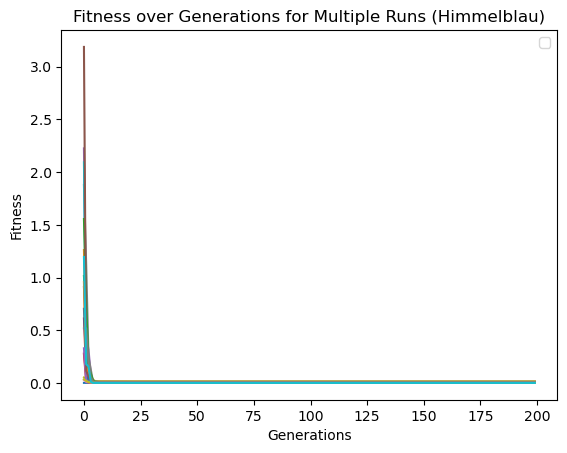

Run 1 - Best solution: [-3.779278248264286, -3.2832074464026855], Fitness: 9.92532275928057e-08
Run 2 - Best solution: [3.593881132219426, -1.8503852903028917], Fitness: 0.004619958942390907
Run 3 - Best solution: [3.0021362630655375, 1.9921416037232014], Fitness: 0.0008793571875299298
Run 4 - Best solution: [2.999847409781033, 2.0000762951094835], Fitness: 7.275806617618057e-07
Run 5 - Best solution: [-2.8051422903791865, 3.1313801785305557], Fitness: 2.010169199035446e-07
Run 6 - Best solution: [2.99145494773785, 2.031357289997712], Fitness: 0.014286346828650506
Run 7 - Best solution: [3.586251621271076, -1.8751049057755398], Fitness: 0.010652486004872187
Run 8 - Best solution: [3.593881132219426, -1.8503852903028917], Fitness: 0.004619958942390907
Run 9 - Best solution: [3.593881132219426, -1.8751049057755398], Fitness: 0.013748812385910511
Run 10 - Best solution: [-2.8126192111085677, 3.1313801785305557], Fitness: 0.001831520719878317
Run 11 - Best solution: [2.9980163271534295, 2.

In [3]:
def himmelblau(variables):
    x, y = variables
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2


himmelblau_ranges = [(-5, 5)] * 2

repeats = 20
generations = 200
population_size = 200


# Run algorithm for himmelblau function 
results_himmelblau = []
all_fitness_over_generations_himmelblau = []

for i in range(repeats):
    best_solution, fitness_over_generations = genetic_algorithm(himmelblau, himmelblau_ranges, population_size, generations)
    results_himmelblau.append((best_solution, himmelblau(best_solution)))
    all_fitness_over_generations_himmelblau.append(fitness_over_generations)
    plt.plot(fitness_over_generations)

plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.title('Fitness over Generations for Multiple Runs (Himmelblau)')
plt.legend()
plt.show()

# show result for himmelblau 
for i, (solution, fitness) in enumerate(results_himmelblau):
    print(f'Run {i+1} - Best solution: {solution}, Fitness: {fitness}')

best_solution_himmelblau = min(results_himmelblau, key=lambda x: x[1])
print("\nOverall best solution for Himmelblau's function:", best_solution_himmelblau[0])
print('Overall best fitness for Himmelblaus function:', best_solution_himmelblau[1])